##PREDICTING DIGITS USING MNIST-DIGITS DATASET

###Importing Necessary Libraries and the dataset



In [81]:
import keras
from keras.datasets import mnist

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
from keras.models import Sequential
from keras.layers import Dense



### The data, split between train and test sets

In [83]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_classes = 10

###Converting Images to 1-D Array

In [84]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

###Converting class vectors to Binary Class Matrices

In [85]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

###Converting class Labels to one-hot encoded arrays

In [86]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

###Building the model

In [87]:
model = Sequential()

###Adding the hiddenlayers with activation function

In [88]:
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))


###Output Layer with 10 Neurons

In [89]:
model.add(Dense(num_classes, activation='softmax'))

###Compiling the Model

In [90]:

model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

###Model Training

In [91]:
batch_size = 128
epochs = 20
history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (X_test, y_test))




Epoch 1/20
469/469 [==============================] - 14s 28ms/step - loss: 0.2128 - accuracy: 0.9368 - val_loss: 0.0976 - val_accuracy: 0.9684
Epoch 2/20
469/469 [==============================] - 13s 27ms/step - loss: 0.0827 - accuracy: 0.9743 - val_loss: 0.0910 - val_accuracy: 0.9719
Epoch 3/20
469/469 [==============================] - 12s 27ms/step - loss: 0.0547 - accuracy: 0.9827 - val_loss: 0.0804 - val_accuracy: 0.9760
Epoch 4/20
469/469 [==============================] - 13s 27ms/step - loss: 0.0404 - accuracy: 0.9868 - val_loss: 0.0722 - val_accuracy: 0.9777
Epoch 5/20
469/469 [==============================] - 13s 27ms/step - loss: 0.0314 - accuracy: 0.9894 - val_loss: 0.0834 - val_accuracy: 0.9772
Epoch 6/20
469/469 [==============================] - 13s 28ms/step - loss: 0.0283 - accuracy: 0.9908 - val_loss: 0.0778 - val_accuracy: 0.9785
Epoch 7/20
469/469 [==============================] - 14s 30ms/step - loss: 0.0222 - accuracy: 0.9929 - val_loss: 0.0748 - val_accuracy:

In [95]:
predicted = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


###Evaluating the model on the test data 

In [92]:
score = model.evaluate(X_test, y_test, verbose=0)

###Printing test Loss and Accuracy 

In [93]:
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 0.10038580000400543
Test Accuracy: 0.978600025177002


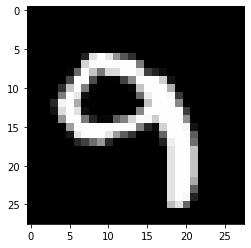

 Real label : 9
 Predicted label: 9


In [94]:
import matplotlib.pyplot as plt

ind = 1545
sample_image = X_test[ind]

pixels = sample_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print(' Real label :',np.argmax(y_test[ind]))
print(' Predicted label:',np.argmax(predicted[ind]))